#Number of deaths by risk factor around the world
I gonna focus on the air pollution issue.

#####CRISP DM - Methodology for Data Science projects.
* Business Understanding
* Data Understanding
* Data Preparation
* Explaratory Data Analysis
* Modelling
* Evaluation
* Deployment

#Business Understanding

* Number of deaths by risk factors around the world from 1990 to 2017.
* There is correlation between whitch features?
* Can we estimate the number of deaths for the next years to come?
* Likely Regression model
* Data source -> [Kaggle](https://www.kaggle.com/pavan9065/air-pollution?select=death-rates-from-air-pollution.csv)


#Data understanding
We already know from the description of the data that the number of deaths in this columns includes children, adults, women, men, and all ages. So let's keep it in mind.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/number-of-deaths-by-risk-factor.csv")
df.head()

,Entity,Code,Year,Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number),Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number),Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Child wasting - Sex: Both - Age: All Ages (Number),Deaths - Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Low birth weight for gestation - Sex: Both - Age: All Ages (Number),Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Drug use - Sex: Both - Age: All Ages (Number),Deaths - Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Diet low in vegetables - Sex: Both - Age: All Ages (Number),Deaths - Unsafe sex - Sex: Both - Age: All Ages (Number),Deaths - Low physical activity - Sex: Both - Age: All Ages (Number),Deaths - High fasting plasma glucose - Sex: Both - Age: All Ages (Number),Deaths - High total cholesterol - Sex: Both - Age: All Ages (Number),Deaths - High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Smoking - Sex: Both - Age: All Ages (Number),Deaths - Iron deficiency - Sex: Both - Age: All Ages (Number),Deaths - Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,10408.438846,12168.564631,4234.808095,356.529307,208.325430,8538.964137,7678.717644,387.167582,4221.303183,21610.066160,9505.531962,7701.581280,28183.983348,6393.667372,726.431294,9344.131952,374.844056,26598.006727,4383.83,2737.197934,11381.377345,7299.867330
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,10271.976431,12360.635374,4219.597324,320.598461,217.769691,8642.847151,7789.773033,394.448285,4252.630379,21824.938039,NaN,7747.774903,28435.397514,6429.253320,739.245799,9330.182378,379.854237,26379.532218,4426.36,2741.184956,11487.832390,7386.764303
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,10618.879778,13459.593716,4371.907968,293.257016,247.833251,8961.526496,8083.234634,422.453302,4347.330897,22418.698807,NaN,7991.018971,29173.611201,6561.054957,873.485341,9769.844533,388.130434,27263.127914,4568.91,2798.560245,11866.235572,7640.628526
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,12260.093843,18458.429133,4863.558517,278.129758,285.036181,9377.118485,8452.242405,448.328317,4465.137670,23140.511175,NaN,8281.564408,30074.760910,6731.972560,1040.047422,11433.769491,405.577931,30495.561499,5080.29,2853.301679,12335.961682,7968.311853
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,14197.947963,19958.388545,5292.379854,250.691569,306.646796,9688.448554,8755.372045,464.506355,4566.650504,23725.070084,NaN,8472.297780,30809.491169,6889.328118,1101.764645,12936.955863,415.349195,33323.161401,5499.23,2880.025765,12672.950191,8244.368430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Entity                                                                                  6468 non-null   object 
 1   Code                                                                                    5488 non-null   object 
 2   Year                                                                                    6468 non-null   int64  
 3   Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                       6468 non-null   float64
 4   Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                         6468 non-null   float64
 5   Deaths - No access to handwashing facility - Sex: Both - Age: All Age

##### Changing column names for better understanding.

In [4]:
df.rename(columns={"Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)": "Unsafe water source", "Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)": "Unsafe sanitation", "Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)": "No access to handwashing facility", "Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)": "Household air pollution from solid fuels", "Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)": "Non-exclusive breastfeeding"}, inplace=True)

In [5]:
df.head()

,Entity,Code,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Child wasting - Sex: Both - Age: All Ages (Number),Deaths - Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Low birth weight for gestation - Sex: Both - Age: All Ages (Number),Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Drug use - Sex: Both - Age: All Ages (Number),Deaths - Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Diet low in vegetables - Sex: Both - Age: All Ages (Number),Deaths - Unsafe sex - Sex: Both - Age: All Ages (Number),Deaths - Low physical activity - Sex: Both - Age: All Ages (Number),Deaths - High fasting plasma glucose - Sex: Both - Age: All Ages (Number),Deaths - High total cholesterol - Sex: Both - Age: All Ages (Number),Deaths - High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Smoking - Sex: Both - Age: All Ages (Number),Deaths - Iron deficiency - Sex: Both - Age: All Ages (Number),Deaths - Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,10408.438846,12168.564631,4234.808095,356.529307,208.325430,8538.964137,7678.717644,387.167582,4221.303183,21610.066160,9505.531962,7701.581280,28183.983348,6393.667372,726.431294,9344.131952,374.844056,26598.006727,4383.83,2737.197934,11381.377345,7299.867330
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,10271.976431,12360.635374,4219.597324,320.598461,217.769691,8642.847151,7789.773033,394.448285,4252.630379,21824.938039,NaN,7747.774903,28435.397514,6429.253320,739.245799,9330.182378,379.854237,26379.532218,4426.36,2741.184956,11487.832390,7386.764303
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,10618.879778,13459.593716,4371.907968,293.257016,247.833251,8961.526496,8083.234634,422.453302,4347.330897,22418.698807,NaN,7991.018971,29173.611201,6561.054957,873.485341,9769.844533,388.130434,27263.127914,4568.91,2798.560245,11866.235572,7640.628526
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,12260.093843,18458.429133,4863.558517,278.129758,285.036181,9377.118485,8452.242405,448.328317,4465.137670,23140.511175,NaN,8281.564408,30074.760910,6731.972560,1040.047422,11433.769491,405.577931,30495.561499,5080.29,2853.301679,12335.961682,7968.311853
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,14197.947963,19958.388545,5292.379854,250.691569,306.646796,9688.448554,8755.372045,464.506355,4566.650504,23725.070084,NaN,8472.297780,30809.491169,6889.328118,1101.764645,12936.955863,415.349195,33323.161401,5499.23,2880.025765,12672.950191,8244.368430


In [6]:
df.rename(columns={"Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)" : "Discontinued breastfeeding",
"Deaths - Child wasting - Sex: Both - Age: All Ages (Number)" : "Child wasting",
"Deaths - Child stunting - Sex: Both - Age: All Ages (Number)" : "Child stunting",
"Deaths - Low birth weight for gestation - Sex: Both - Age: All Ages (Number)" : "Low birth weight for gestation",
"Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number)" : "Secondhand smoke",
"Deaths - Alcohol use - Sex: Both - Age: All Ages (Number)" : "Alcohol use",
"Deaths - Drug use - Sex: Both - Age: All Ages (Number)" : "Drug use",
"Deaths - Diet low in fruits - Sex: Both - Age: All Ages (Number)" : "Diet low in fruits",
"Deaths - Diet low in vegetables - Sex: Both - Age: All Ages (Number)" : "Diet low in vegetables",
"Deaths - Unsafe sex - Sex: Both - Age: All Ages (Number)" : "Unsafe sex",
"Deaths - Low physical activity - Sex: Both - Age: All Ages (Number)" : "Low physical activity",
"Deaths - High fasting plasma glucose - Sex: Both - Age: All Ages (Number)" : "High fasting plasma glucose",
"Deaths - High body-mass index - Sex: Both - Age: All Ages (Number)" : "High body-mass index",
"Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number)" : "High systolic blood pressure",
"Deaths - Smoking - Sex: Both - Age: All Ages (Number)" : "Smoking",
"Deaths - Iron deficiency - Sex: Both - Age: All Ages (Number)" : "Iron deficiency",
"Deaths - Vitamin A deficiency - Sex: Both - Age: All Ages (Number)" : "Vitamin A deficiency",
"Deaths - Low bone mineral density - Sex: Both - Age: All Ages (Number)" : "Low bone mineral density",
"Deaths - Air pollution - Sex: Both - Age: All Ages (Number)" : "Air pollution",
"Deaths – Outdoor air pollution (all ages) (IHME)" : "Outdoor air pollution",
"Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number)" : "Diet high in sodium",
"Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number)" : "Diet low in whole grains",
"Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)" : "Diet low in nuts and seeds" }, inplace=True)

In [7]:
df.shape

(6468, 32)

In [8]:
df.head(2)

,Entity,Code,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,Deaths - High total cholesterol - Sex: Both - Age: All Ages (Number),High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,10408.438846,12168.564631,4234.808095,356.529307,208.325430,8538.964137,7678.717644,387.167582,4221.303183,21610.066160,9505.531962,7701.581280,28183.983348,6393.667372,726.431294,9344.131952,374.844056,26598.006727,4383.83,2737.197934,11381.377345,7299.867330
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,10271.976431,12360.635374,4219.597324,320.598461,217.769691,8642.847151,7789.773033,394.448285,4252.630379,21824.938039,NaN,7747.774903,28435.397514,6429.253320,739.245799,9330.182378,379.854237,26379.532218,4426.36,2741.184956,11487.832390,7386.764303


In [9]:
# We have 231 different countries in the data.
df["Entity"].nunique() 

231

In [10]:
# Missing values in the columns "Code" and "Outdoor air pollution".
df.isnull().sum()

Entity                                                                     0
Code                                                                     980
Year                                                                       0
Unsafe water source                                                        0
Unsafe sanitation                                                          0
No access to handwashing facility                                          0
Household air pollution from solid fuels                                   0
Non-exclusive breastfeeding                                                0
Discontinued breastfeeding                                                 0
Child wasting                                                              0
Child stunting                                                             0
Low birth weight for gestation                                             0
Secondhand smoke                                                           0

In [ ]:
# Missing values in the columns "Code", "Outdoor air pollution" and "Deaths - High total cholesterol". This last one we will drop, since its very compromised.

In [11]:
df.describe()

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,Deaths - High total cholesterol - Sex: Both - Age: All Ages (Number),High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,1.561000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6.468000e+03,6.467000e+03,6.468000e+03,6.468000e+03,6.468000e+03
mean,2003.500000,3.156632e+04,2.337436e+04,1.893305e+04,4.308421e+04,6231.427632,409.110423,4.344643e+04,1.176772e+04,3.094801e+04,2.428225e+04,5.020334e+04,8890.242150,4.545264e+04,2.874201e+04,2.676445e+04,2.114149e+04,9.955571e+04,5.162825e+04,6.868529e+04,1.743832e+05,1.335483e+05,1878.745701,11908.622027,4579.055654,9.573551e+04,5.557313e+04,5.424067e+04,5.334881e+04,3.496704e+04
std,8.078372,1.527731e+05,1.144930e+05,8.981037e+04,1.877345e+05,28517.846341,1874.989431,2.022367e+05,5.824891e+04,1.342946e+05,1.002562e+05,1.958226e+05,35415.115589,1.834286e+05,1.116600e+05,1.217091e+05,8.221599e+04,3.840330e+05,2.672999e+05,2.681341e+05,6.809915e+05,5.299315e+05,9011.891580,58801.648611,18884.513384,3.909335e+05,2.298038e+05,2.434373e+05,2.097153e+05,1.359432e+05
min,1990.000000,8.650193e-03,6.495981e-03,7.791357e-02,2.058533e-02,0.003816,0.000520,1.017127e-01,1.400828e-03,3.266384e-01,2.890665e+00,-2.315345e+03,1.240062,1.578807e+00,7.764380e-01,1.021822e+00,2.416705e+00,2.104263e+01,9.527324e+00,1.999821e+01,2.102607e+01,1.170748e+01,0.005499,0.003465,0.381232,8.524593e+00,4.830000e+00,2.673823e+00,9.317592e+00,5.188788e+00
25%,1996.750000,1.019665e+01,4.603845e+00,1.688487e+01,8.759783e+01,4.633254,0.264366,4.137245e+01,1.863717e+00,1.445628e+02,2.780677e+02,3.639522e+02,92.909932,5.360437e+02,4.129828e+02,1.360830e+02,2.615592e+02,2.034714e+03,8.388941e+02,1.141443e+03,2.665313e+03,1.292926e+03,2.256209,1.896386,40.602658,1.076837e+03,5.537050e+02,3.556373e+02,7.987349e+02,5.533485e+02
50%,2003.500000,2.790317e+02,1.601965e+02,2.524991e+02,1.091671e+03,102.428307,6.619327,7.303462e+02,7.787362e+01,1.220717e+03,1.196228e+03,2.803322e+03,408.586291,2.452886e+03,1.837753e+03,8.318223e+02,1.189412e+03,7.820165e+03,4.004748e+03,4.739652e+03,1.099331e+04,5.935789e+03,31.990666,70.490245,246.750756,6.125098e+03,2.242020e+03,1.945638e+03,3.504309e+03,2.279157e+03
75%,2010.250000,5.301718e+03,3.832344e+03,3.811442e+03,9.161964e+03,1367.827277,78.279446,1.023454e+04,1.971596e+03,8.708146e+03,5.963666e+03,1.289127e+04,2170.843581,1.052182e+04,7.612299e+03,5.948953e+03,5.694744e+03,3.470479e+04,1.742251e+04,2.160117e+04,4.732284e+04,3.163810e+04,421.383585,2081.946722,1096.103891,2.272736e+04,1.282150e+04,9.691376e+03,1.446369e+04,1.003880e+04
max,2017.000000,2.111659e+06,1.638021e+06,1.239519e+06,2.708905e+06,514102.351577,34850.395532,3.365309e+06,1.001277e+06,1.976613e+06,1.260994e+06,2.842854e+06,585348.180194,2.423447e+06,1.462367e+06,1.771141e+06,1.263051e+06,6.526028e+06,4.392505e+06,4.724346e+06,1.044082e+07,7.099111e+06,125242.948306,986994.996195,327314.262607,4.895476e+06,3.408878e+06,3.196514e+06,3.065589e+06,2.062522e+06


#####Data Wrangling
Let's start cleaning up the data now.
We have missing values, and columns with no relevant data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Entity                                                                6468 non-null   object 
 1   Code                                                                  5488 non-null   object 
 2   Year                                                                  6468 non-null   int64  
 3   Unsafe water source                                                   6468 non-null   float64
 4   Unsafe sanitation                                                     6468 non-null   float64
 5   No access to handwashing facility                                     6468 non-null   float64
 6   Household air pollution from solid fuels                              6468 non-null   float64
 7

In [13]:
# This column has only one missing value, I'll fill it with the average of the values.

df["Outdoor air pollution"].fillna(df["Outdoor air pollution"].mean(), inplace=True)

In [14]:
# Droping the High total cholesterol column since there are many missing values. 

df.drop("Deaths - High total cholesterol - Sex: Both - Age: All Ages (Number)", axis=1, inplace=True)

In [15]:
# Excluding the "Code" column since it is an abbreviation for the countries that are already listed in the "Entity" column.

df.drop("Code", axis=1, inplace=True)

In [16]:
df.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,10408.438846,12168.564631,4234.808095,356.529307,208.325430,8538.964137,7678.717644,387.167582,4221.303183,21610.066160,7701.581280,28183.983348,6393.667372,726.431294,9344.131952,374.844056,26598.006727,4383.83,2737.197934,11381.377345,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,10271.976431,12360.635374,4219.597324,320.598461,217.769691,8642.847151,7789.773033,394.448285,4252.630379,21824.938039,7747.774903,28435.397514,6429.253320,739.245799,9330.182378,379.854237,26379.532218,4426.36,2741.184956,11487.832390,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,10618.879778,13459.593716,4371.907968,293.257016,247.833251,8961.526496,8083.234634,422.453302,4347.330897,22418.698807,7991.018971,29173.611201,6561.054957,873.485341,9769.844533,388.130434,27263.127914,4568.91,2798.560245,11866.235572,7640.628526
3,Afghanistan,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,12260.093843,18458.429133,4863.558517,278.129758,285.036181,9377.118485,8452.242405,448.328317,4465.137670,23140.511175,8281.564408,30074.760910,6731.972560,1040.047422,11433.769491,405.577931,30495.561499,5080.29,2853.301679,12335.961682,7968.311853
4,Afghanistan,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,14197.947963,19958.388545,5292.379854,250.691569,306.646796,9688.448554,8755.372045,464.506355,4566.650504,23725.070084,8472.297780,30809.491169,6889.328118,1101.764645,12936.955863,415.349195,33323.161401,5499.23,2880.025765,12672.950191,8244.368430


In [17]:
# Zero missing values.
df.isnull().sum()

Entity                                      0
Year                                        0
Unsafe water source                         0
Unsafe sanitation                           0
No access to handwashing facility           0
Household air pollution from solid fuels    0
Non-exclusive breastfeeding                 0
Discontinued breastfeeding                  0
Child wasting                               0
Child stunting                              0
Low birth weight for gestation              0
Secondhand smoke                            0
Alcohol use                                 0
Drug use                                    0
Diet low in fruits                          0
Diet low in vegetables                      0
Unsafe sex                                  0
Low physical activity                       0
High fasting plasma glucose                 0
High body-mass index                        0
High systolic blood pressure                0
Smoking                           

In [18]:
# I'm going to delete these records as we want to focus on numbers by country and not by region. Keeping this data is redundant.
df.drop(df[df['Entity'] == "World"].index, inplace=True)
df.drop(df[df['Entity'] == "Southeast Asia, East Asia, and Oceania"].index, inplace=True)
df.drop(df[df['Entity'] == "East Asia"].index, inplace=True)
df.drop(df[df['Entity'] == "High-middle SDI"].index, inplace=True)
df.drop(df[df['Entity'] == "Middle SDI"].index, inplace=True)
df.drop(df[df['Entity'] == "Low-middle SDI"].index, inplace=True)
df.drop(df[df['Entity'] == "High SDI"].index, inplace=True)
df.drop(df[df['Entity'] == "High-income"].index, inplace=True)
df.drop(df[df['Entity'] == "Low SDI"].index, inplace=True)
df.drop(df[df['Entity'] == "Central Europe, Eastern Europe, and Central Asia"].index, inplace=True)
df.drop(df[df['Entity'] == "Eastern Europe"].index, inplace=True)
df.drop(df[df['Entity'] == "Western Europe"].index, inplace=True)
df.drop(df[df['Entity'] == "North Africa and Middle East"].index, inplace=True)
df.drop(df[df['Entity'] == "Sub-Saharan Africa"].index, inplace=True)	
df.drop(df[df['Entity'] == "North America"].index, inplace=True)
df.drop(df[df['Entity'] == "Southeast Asia"].index, inplace=True)
df.drop(df[df['Entity'] == "Latin America and Caribbean"].index, inplace=True)
df.drop(df[df['Entity'] == "Central Europe"].index, inplace=True)
df.drop(df[df['Entity'] == "Western Sub-Saharan Africa"].index, inplace=True)
df.drop(df[df['Entity'] == "High-income Asia Pacific"].index, inplace=True)


##### Data Visualization


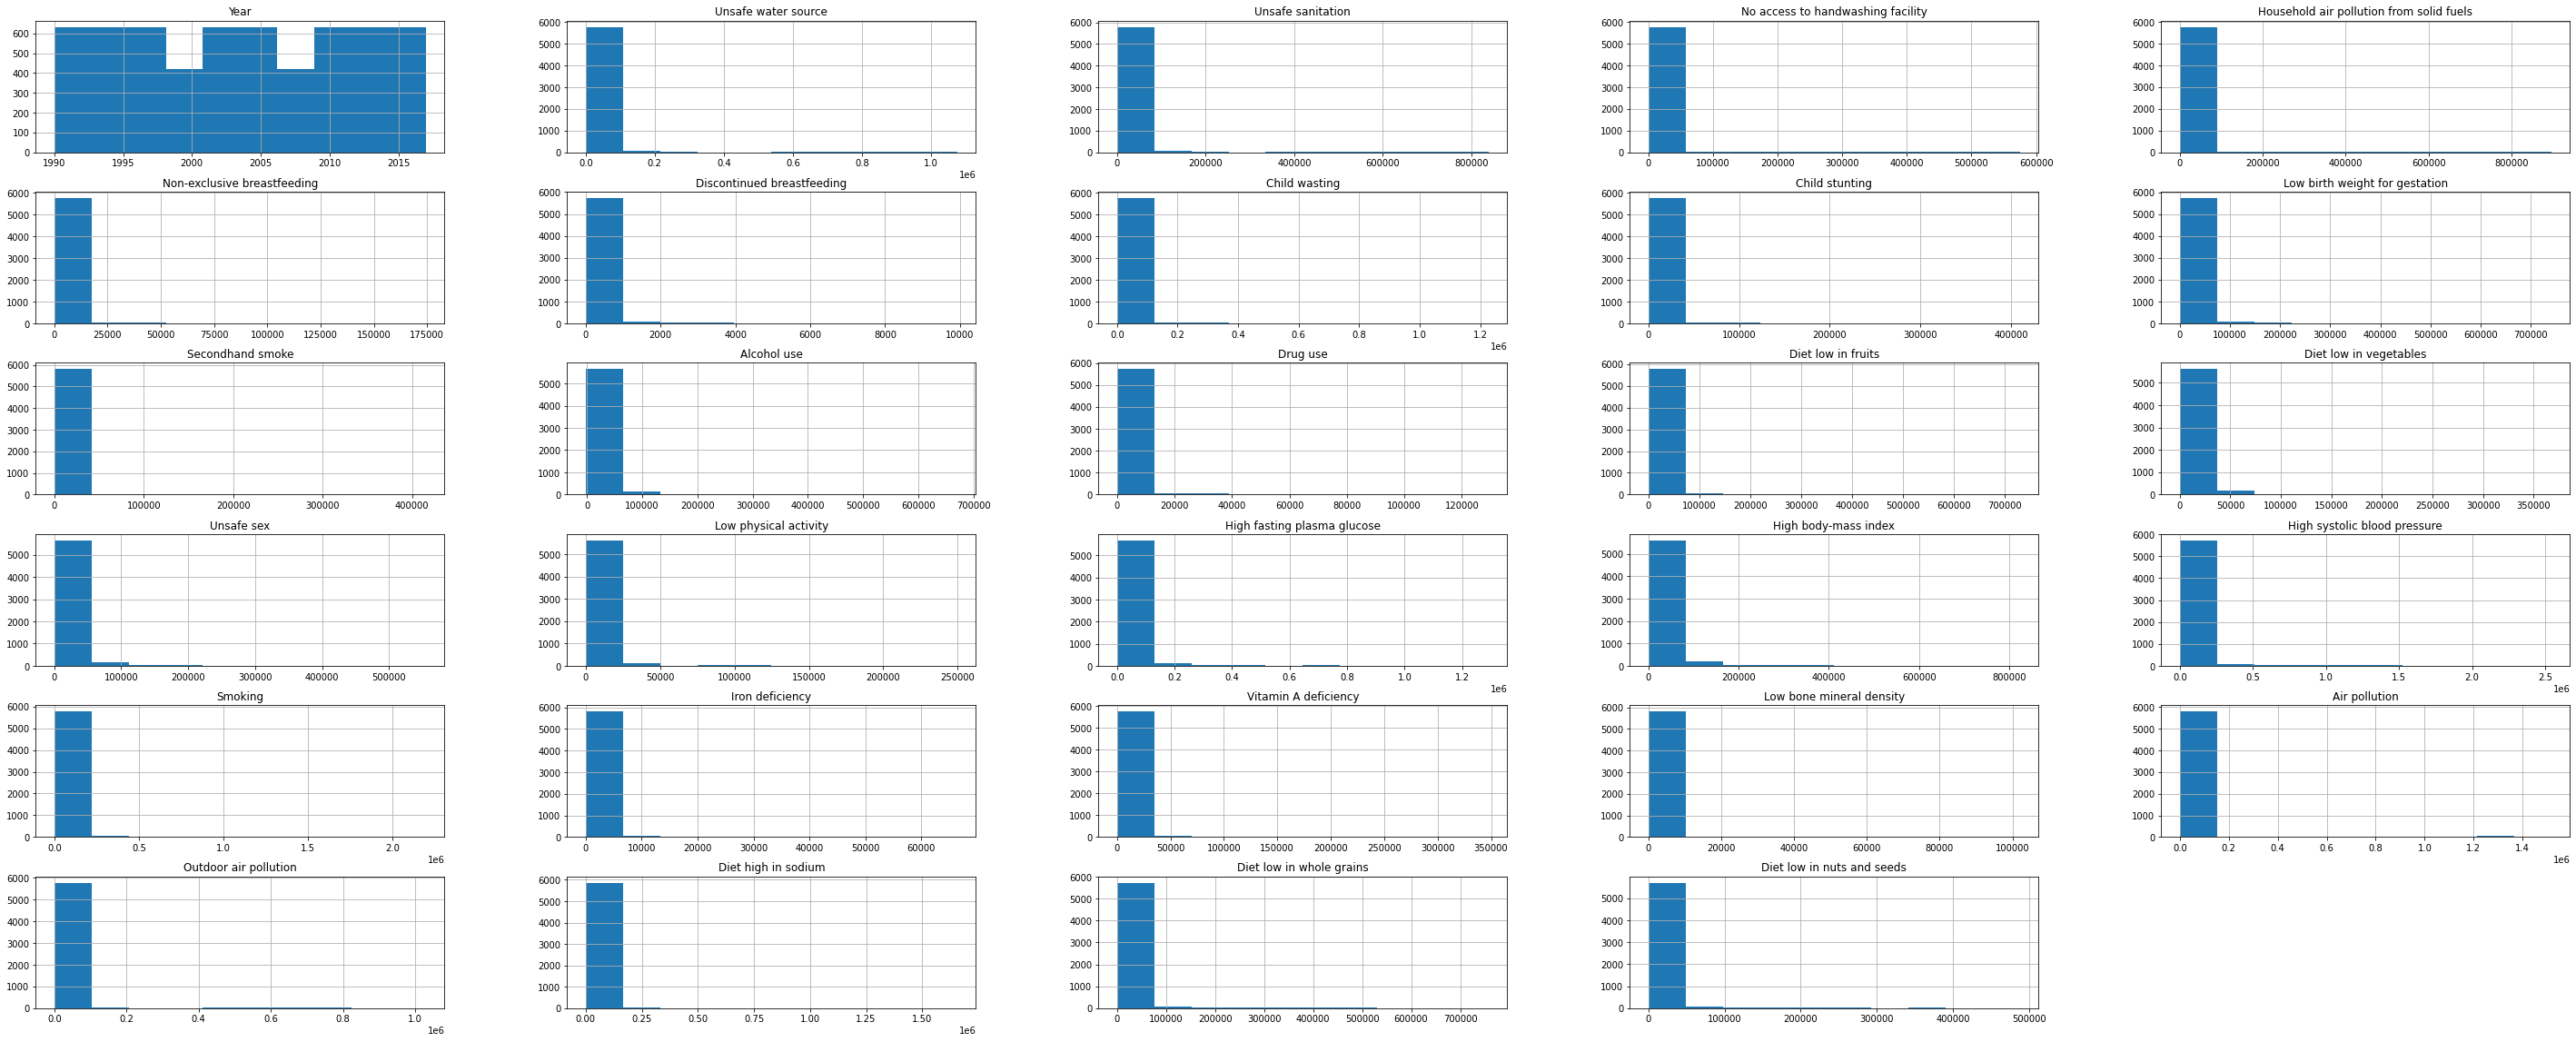

In [19]:
# We are good to go, let's do some visualization.
# Let's see the distribution through histogram.
df.hist(bins=10, figsize=(50, 20));
plt.show()

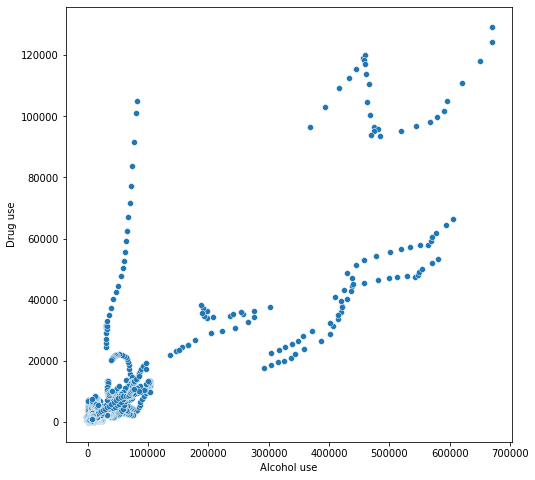

In [20]:
# The correlation between alchool and drugs deaths through scatter plot.
plt.rcParams['figure.figsize'] = [8, 8]
sns.scatterplot(x="Alcohol use", y="Drug use", data=df);

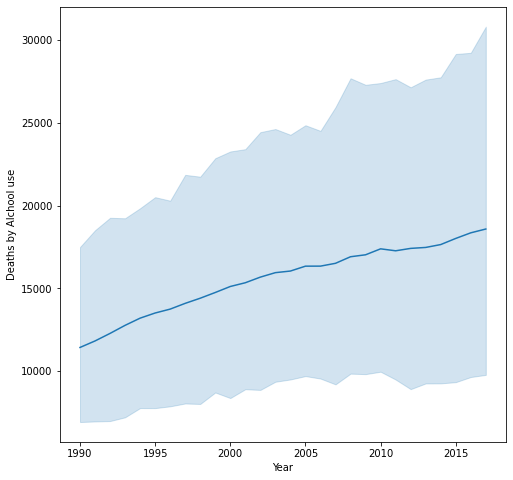

In [21]:
# Deaths by alchool use through the years

sns.lineplot(x="Year", y="Alcohol use", data=df);
plt.ylabel("Deaths by Alchool use");

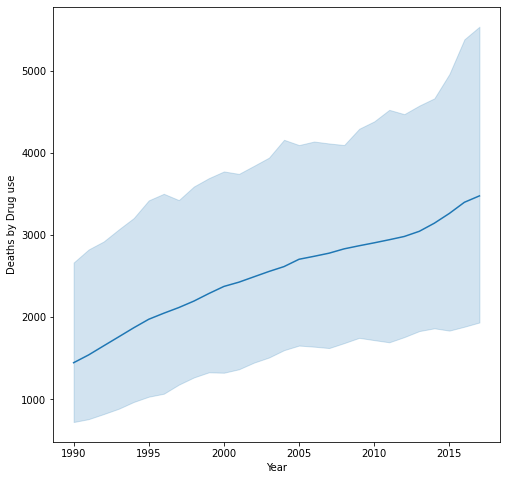

In [22]:
# Deaths by drug use through the years.

sns.lineplot(x="Year", y="Drug use", data=df);
plt.ylabel("Deaths by Drug use");

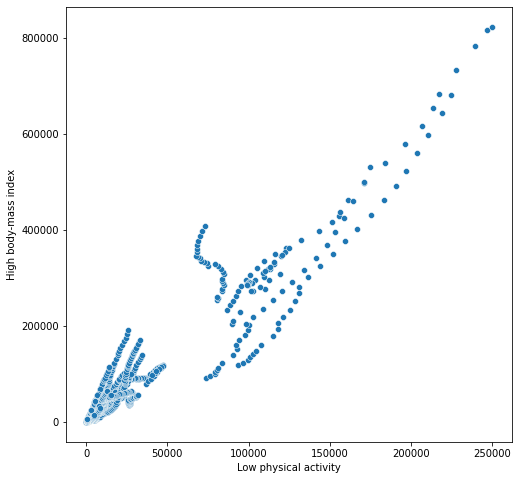

In [23]:
# There is correlation between deaths by Low physical activity and High body-mass index?

sns.scatterplot(x="Low physical activity", y="High body-mass index", data=df);

I plot some relationships that might be interesting to see. But let's see the correlation between all columns with a heatmap.

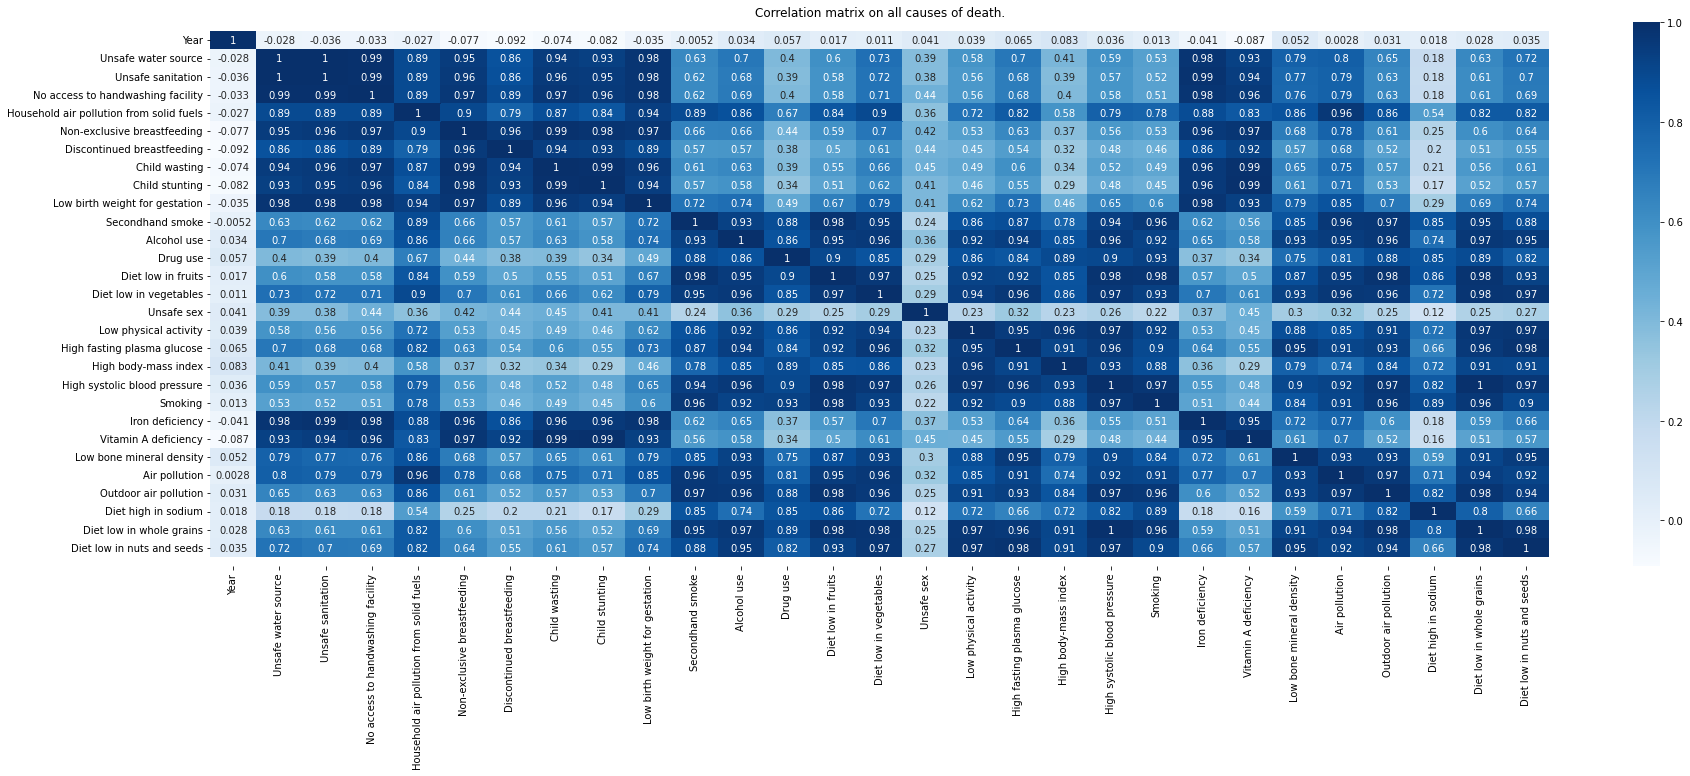

In [24]:
plt.rcParams['figure.figsize'] = [30, 10]
correlation = df.corr()
ax = sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation matrix on all causes of death.')

plt.show()

###### Results of correlation matrix
We see many correlations that are obvious but others are surprising. Remembering that a perfect positive correlation has a value of 1 and a perfect negative correlation has a value of -1.

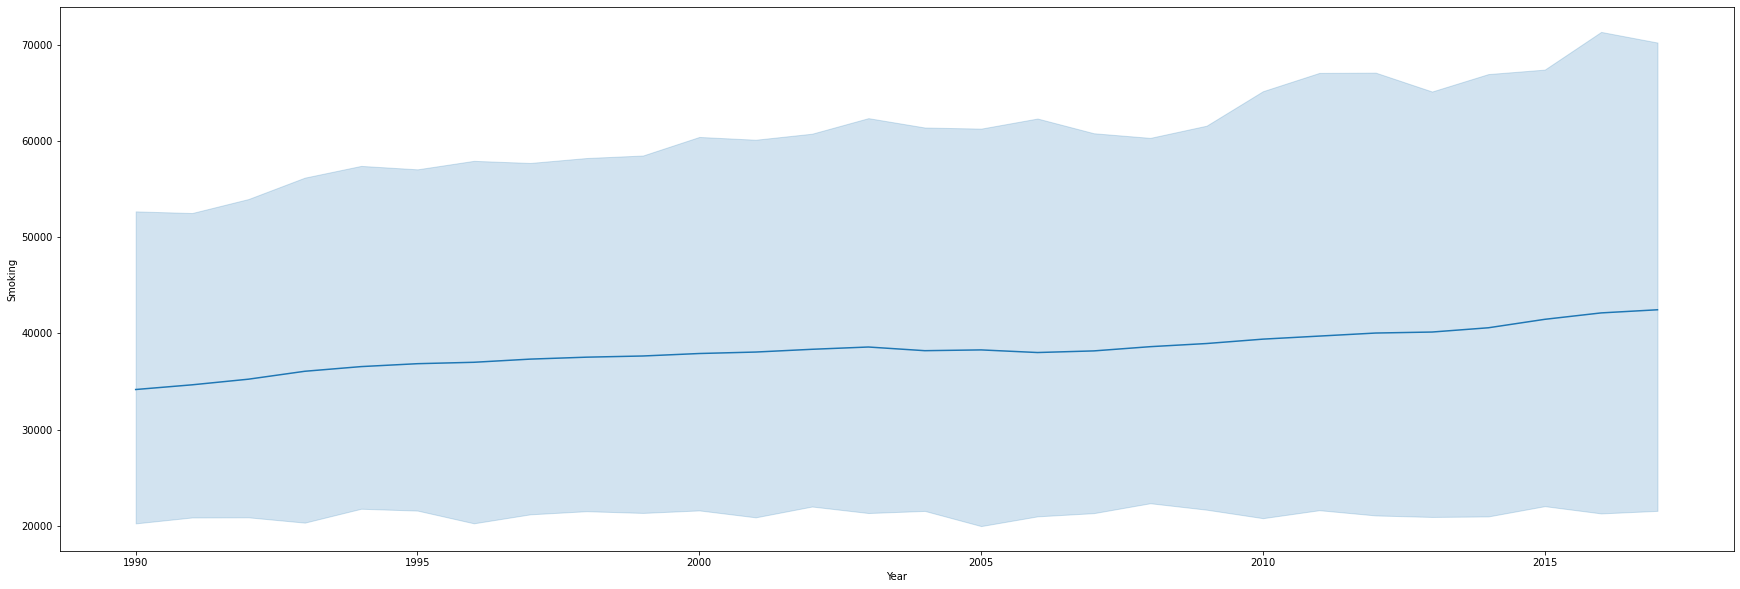

In [25]:
# Deaths by smoking through the years.
sns.lineplot(x="Year", y="Smoking", data=df);

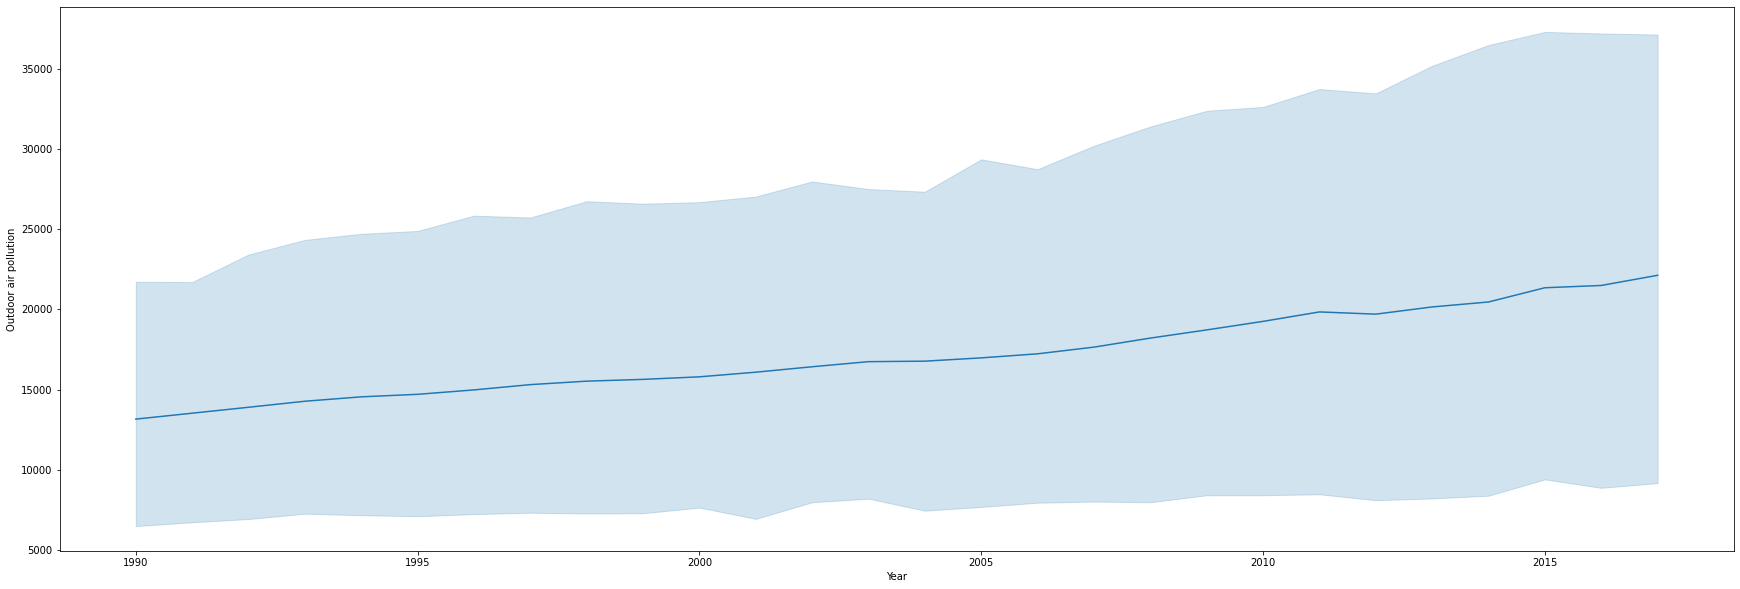

In [26]:
# Deaths by air polution through the years.
sns.lineplot(x="Year", y="Outdoor air pollution", data=df); 

####Data air pollution
Let's work with the air pollution data.

In [27]:
# Getting the Outdoor air pollution mean by country.
air_pollution = df.groupby("Entity")["Outdoor air pollution"].mean().reset_index()
air_pollution

,Entity,Outdoor air pollution
0,Afghanistan,5880.092500
1,Albania,708.266786
2,Algeria,10050.984286
3,American Samoa,11.251429
4,Andean Latin America,9500.638571
...,...,...
206,Vietnam,18818.880000
207,Wales,1594.166071
208,Yemen,4567.872143
209,Zambia,1534.849643


In [28]:
# Sorting in descendent order
air_pollution.sort_values(by="Outdoor air pollution", ascending=False, inplace=True)
# Making a dataframe from it
air_pollution = pd.DataFrame(air_pollution)

In [29]:
air_pollution.head()

,Entity,Outdoor air pollution
43,China,821687.743571
172,South Asia,638432.304286
88,India,537817.995357
154,Russia,129943.536071
200,United States,114423.018214


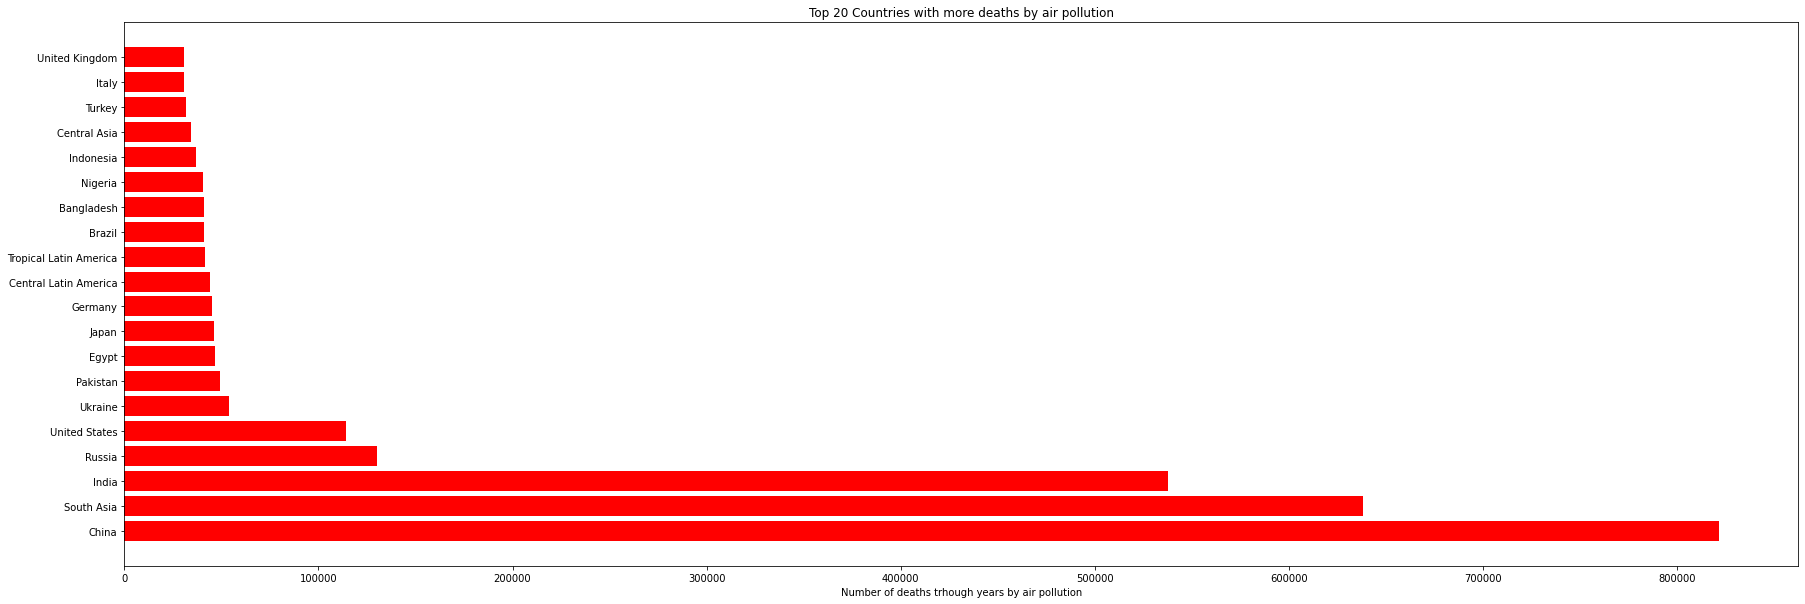

In [30]:
# Top 20 country
plt.barh(air_pollution["Entity"].head(20), width=air_pollution["Outdoor air pollution"].head(20), color="red");
plt.xlabel("Number of deaths trhough years by air pollution");
plt.title("Top 20 Countries with more deaths by air pollution");

####Data on Brazil

In [31]:
 brazil = df[df['Entity'] == "Brazil"]
 brazil.shape

(28, 30)

In [32]:
brazil.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
756,Brazil,1990,31596.672865,22615.887961,17214.803386,39624.076416,19011.205363,2921.456211,54294.319230,6423.533340,52224.769940,33385.556873,36034.248871,5376.568790,31512.926887,39350.142796,12765.838731,22536.931728,71883.165905,68946.495910,150250.124350,152553.593098,1156.299341,11671.220264,3246.054916,66361.941618,27331.81,36444.990074,50164.697883,35083.216229
757,Brazil,1991,29208.336019,21170.546888,15852.255531,37827.582538,17228.986355,2704.616995,49814.286862,5857.034735,49731.402112,31713.936000,37845.986372,5693.795918,31016.066002,38608.743688,14687.783593,22216.807537,71338.514206,69622.890551,149169.396628,152272.632136,1040.962558,10739.477383,3291.959956,64908.334170,27680.94,36378.723478,49373.922364,34471.146240
758,Brazil,1992,26729.132040,19658.601202,14468.368756,36759.743514,15486.338632,2479.399554,45931.666293,5305.158779,47178.467864,31084.375021,40290.291196,6043.411889,31523.098059,39152.334390,16697.546438,22648.902002,73086.658238,72575.535435,152885.383124,156474.054204,962.716760,9824.831527,3389.254617,65148.205425,29015.14,37498.226159,50219.382870,34987.342150
759,Brazil,1993,24492.815316,18291.934249,13232.187813,35915.552557,13948.354232,2272.231999,42449.976798,4813.314126,44882.631868,30940.629467,43739.598177,6477.550954,32298.961146,40201.768213,19262.739206,23453.932025,76060.563137,76654.245829,158714.680151,162500.308324,933.412802,9019.333415,3548.594859,66189.647526,30939.15,38979.205127,51687.241168,36057.948436
760,Brazil,1994,22152.178802,16786.383914,11964.878908,34120.747175,12557.874737,2055.294250,39188.657670,4350.430238,42757.966893,30037.748543,46877.128537,6862.651328,31979.423068,40002.087597,21164.966201,23528.835044,77133.941580,78844.547317,159959.035741,163728.129021,994.755510,8233.170095,3623.013693,65458.049082,32018.00,39437.176532,51547.388016,36088.945697


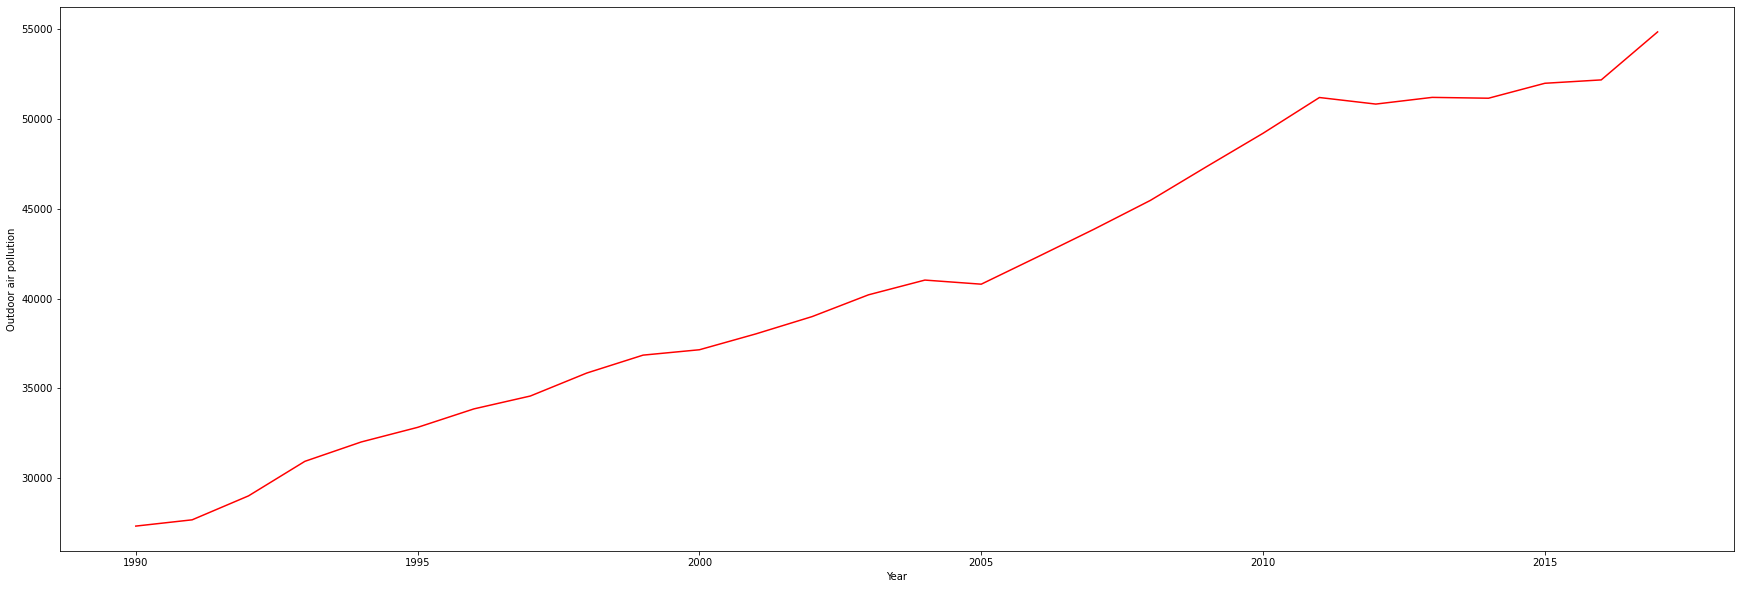

In [33]:
# Let's see the deaths by air pollution through the years
sns.lineplot(x="Year", y="Outdoor air pollution", data=brazil, color="red");

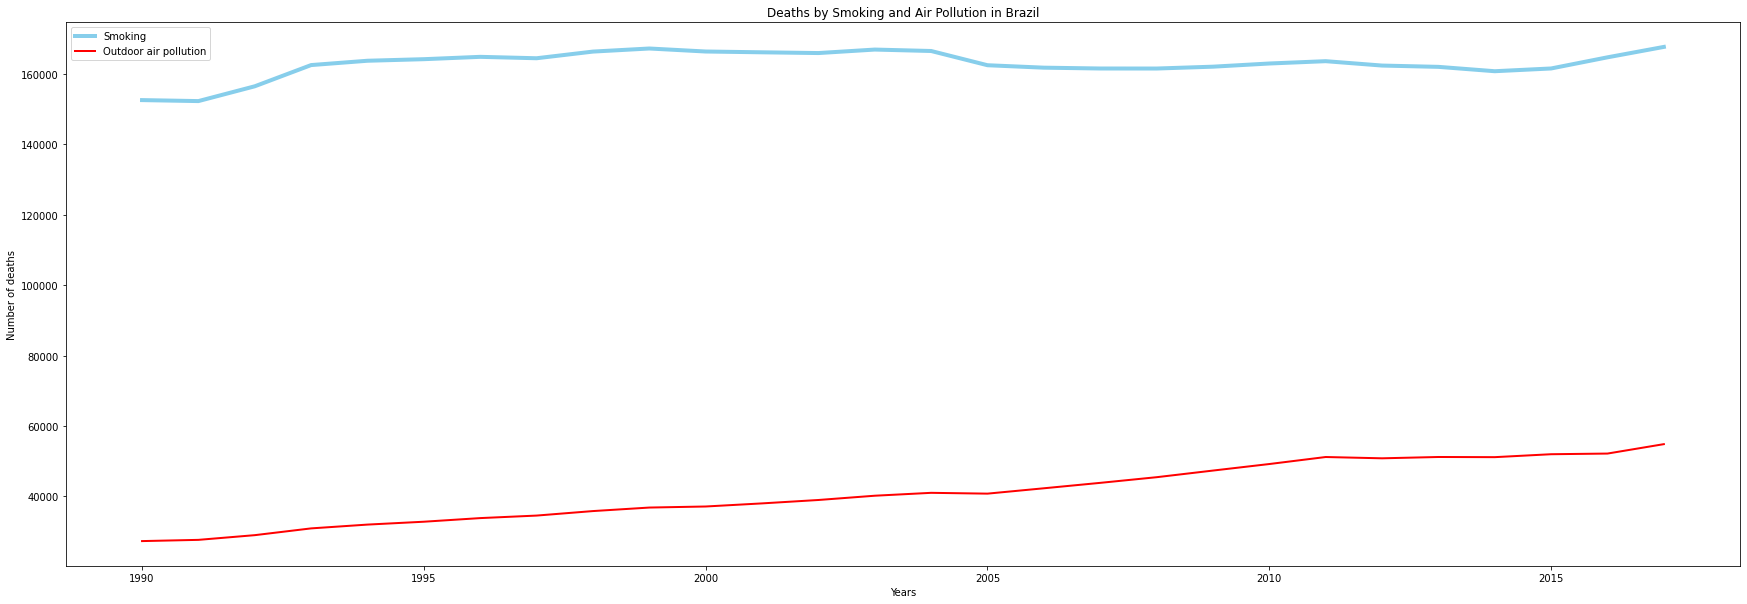

In [34]:
# The number of deaths by air pollution and smoking together.

plt.plot( 'Year', 'Smoking', data=brazil, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( "Year", 'Outdoor air pollution', data=brazil, marker='', color='red', linewidth=2)

plt.xlabel("Years")
plt.ylabel("Number of deaths")
plt.title("Deaths by Smoking and Air Pollution in Brazil")


plt.legend()


plt.show()

In [35]:
# Overall on brazil death causes

brazil.describe()

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2003.500000,11190.458622,8611.007414,6877.777885,23452.455663,6352.613234,989.717085,23503.939588,2255.934028,29282.275047,25892.230424,64605.860978,9493.676958,30655.177894,39739.737428,20936.022488,25686.801796,94475.821169,110605.665223,180438.442846,162898.418608,729.683841,4279.680369,4961.965800,63782.291638,41032.951071,43772.368734,52543.583307,39167.496351
std,8.225975,8855.952109,6407.171572,4204.993770,8469.012840,5310.199151,864.823064,13511.749286,1785.576919,11721.350527,3120.430273,13435.029332,2589.478503,930.312169,1152.864968,2536.852672,2827.976364,16671.860460,29100.478104,22051.950182,3851.205085,158.294743,3312.843117,1563.864547,1567.605556,8400.101400,3672.089534,2445.535818,3612.580236
min,1990.000000,2948.287161,2231.321541,3532.833969,12154.330399,1128.499694,144.644793,9394.477006,402.476247,12554.493622,22712.014140,36034.248871,5376.568790,28674.689357,38608.743688,12765.838731,22216.807537,71338.514206,68946.495910,149169.396628,152272.632136,524.514260,779.680359,3246.054916,60956.411387,27331.810000,36378.723478,49373.922364,34471.146240
25%,1996.750000,3929.459096,3291.518885,3683.594989,16182.852459,2049.940101,271.254681,11850.469003,789.639503,19736.982337,23668.930182,56062.423848,7550.207421,30298.536287,39013.451999,20546.728578,23450.642768,79492.217917,84692.520862,161194.934227,161705.312526,622.468447,1465.287313,3692.413824,62618.326362,34398.272500,41750.995143,50870.455919,36081.196382
50%,2003.500000,7738.329199,6295.258158,4836.014154,22784.935864,4385.597592,661.048072,19785.219702,1656.552301,27623.181135,24627.515872,71442.500735,9235.394596,30844.276958,39395.772245,21172.341736,24985.218828,94286.020304,109317.231349,178369.016318,163275.516908,696.049196,3197.879980,4366.815939,63902.531907,40510.905000,44475.615027,51750.101902,38437.501630
75%,2010.250000,15998.498313,12473.480294,8789.040563,29285.848016,9266.332791,1508.786906,31715.984479,3271.448375,37795.402479,27263.468417,73465.566942,11411.682478,31365.291424,40208.908055,22639.426776,27844.231513,105807.381134,135314.766499,197158.543659,165965.319539,784.089479,6331.067354,6197.379661,64923.191681,49620.147500,46265.363273,54013.675667,42032.589080
max,2017.000000,31596.672865,22615.887961,17214.803386,39624.076416,19011.205363,2921.456211,54294.319230,6423.533340,52224.769940,33385.556873,83215.482972,14738.871073,32298.961146,43919.436449,23774.420285,32410.235407,131163.038129,165953.837309,230453.822812,167657.269420,1156.299341,11671.220264,8080.305714,66361.941618,54859.560000,51433.601690,60108.888322,47677.472503


In [36]:
# Making a new dataframe with the sum of deaths per cause. So let's find out the causes that kill the most in Brazil from 1990 to 2017 for curiosity.

bra = pd.DataFrame(brazil.sum())
bra = bra.reset_index()
bra.rename(columns={"index" : "Causes", 0 : "Deaths"}, inplace=True)
bra.drop(bra[bra["Causes"] == "Entity"].index, inplace=True)
bra.sort_values(by="Deaths", ascending=False, inplace=True)

In [37]:
bra.head()

,Causes,Deaths
20,High systolic blood pressure,5.05228e+06
21,Smoking,4.56116e+06
19,High body-mass index,3.09696e+06
18,High fasting plasma glucose,2.64532e+06
12,Alcohol use,1.80896e+06


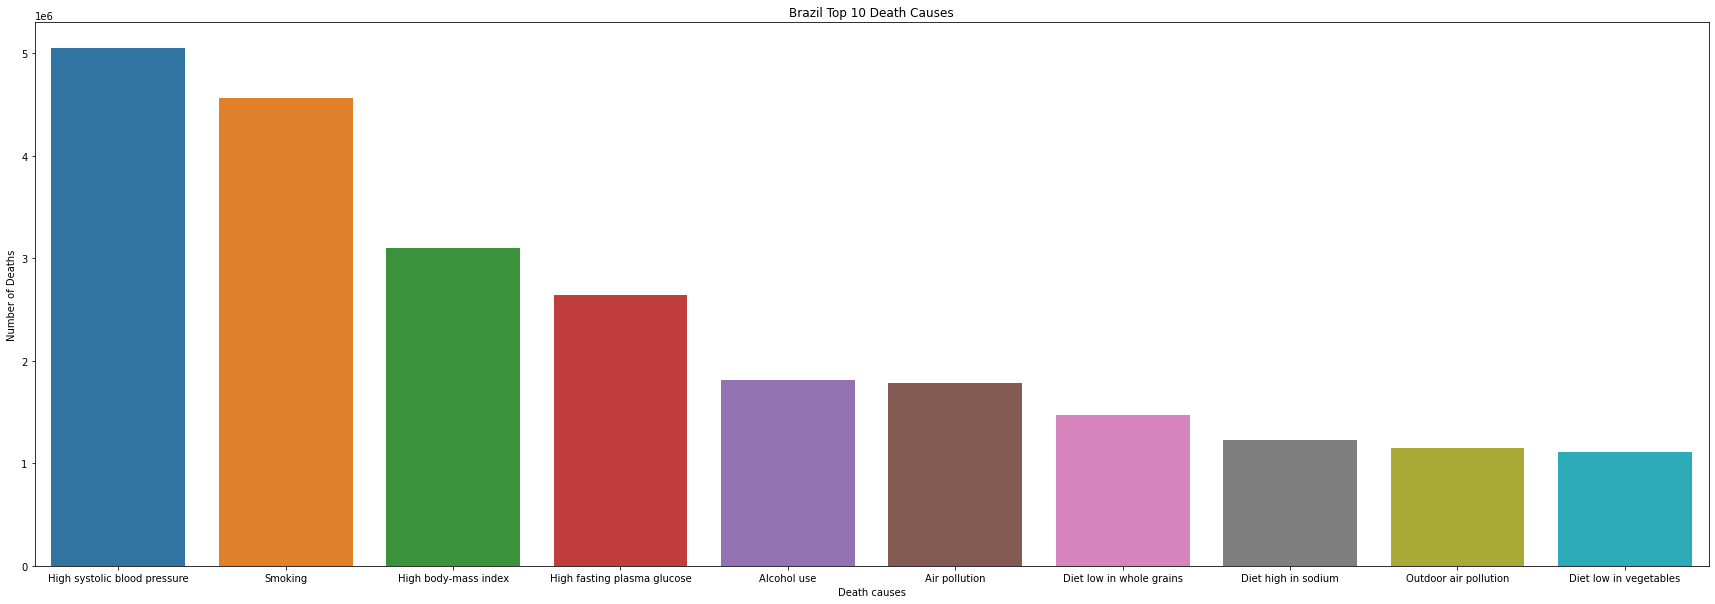

In [38]:
# Ploting the top 10 causes of death in brazil.
sns.barplot(y="Deaths", x="Causes", data=bra.head(10));
plt.xlabel("Death causes");
plt.ylabel("Number of Deaths");
plt.title("Brazil Top 10 Death Causes");

####Data Analysis
Let's do some hypothesis testing on the data on some death causes by year

##### Pearson's correlation test

H_0: µ_1 = µ_2 -> There IS NOT a correlation between years and deaths by air pollution.

H_1: µ_1 ≠ µ_2 -> There IS a rcorrelation between years and deaths by air pollution.

In [39]:
import scipy.stats
# For data on all countries.
year_causes = df.groupby("Year")["Outdoor air pollution"].sum().reset_index()

# The test
correlation, p_value = scipy.stats.pearsonr(year_causes['Year'], year_causes["Outdoor air pollution"])
print(f'The correlation value is: {round(correlation, 2)}')
print(f'The p-value is: {p_value}')

The correlation value is: 0.99
The p-value is: 3.474926227515869e-23


Since the p-value is less than alpha, we reject the null hypothesis!! There is a very strong positive correlation (0.99) between years and air pollution deaths. 
**That is not good news, because its mean that the number of deaths by air pollution is increasing each year.**

In [40]:
# Let's test on brazil data.

year_deaths_brazil = brazil.groupby("Year")["Outdoor air pollution"].sum().reset_index()

# The test
correlation, p_value = scipy.stats.pearsonr(year_deaths_brazil['Year'], year_deaths_brazil["Outdoor air pollution"])
print(f'The correlation value is: {round(correlation, 2)}')
print(f'The p-value is: {p_value}')

The correlation value is: 0.99
The p-value is: 1.3365524444999243e-26


Since the p-value is less than alpha, we reject the null hypothesis for brazil also!! There is a very strong positive correlation (0.99) between years and air pollution deaths. 
**Bad news, because it's mean that the number of deaths by air pollution is increasing each year in brazil. And by the level of the correlation, it's bad.**

#Data Preparation
Despite all the potential of this dataset, I will now focus on building a model that will predict the number of deaths from air pollution over the next few years. So let's prepare the data for the model.
I will use only the "Year" feature to predict our taget, which is "Outdoor pollution", since there are a strong correlation and make sense.

In [184]:
# Getting the features
df = df.groupby("Year")[["Outdoor air pollution"]].sum().reset_index()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


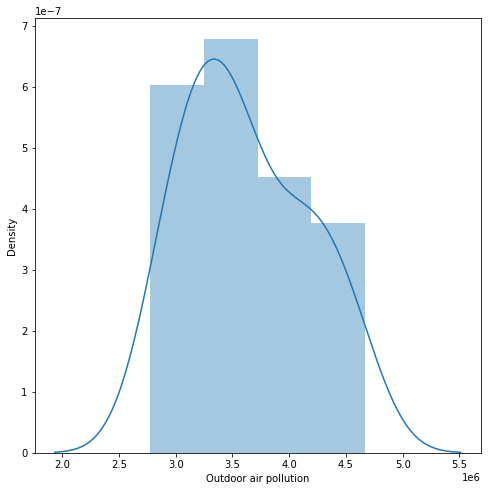

In [185]:
# let's see the distribution of the features.
# # the distribution of our target "Outdoor air pollution".
sns.distplot(df["Outdoor air pollution"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


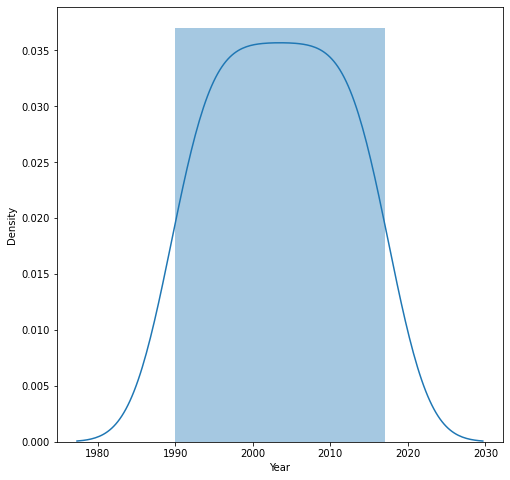

In [186]:
# the distribution of the "Year" feature.
sns.distplot(df["Year"]);

In [187]:

X = df[["Year"]].values
y = df["Outdoor air pollution"].values

In [188]:
X

array([[1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017]])

In [189]:
y

array([2776844.18, 2854715.76, 2932632.34, 3012144.78, 3069931.01,
       3103134.73, 3161062.01, 3230713.7 , 3276255.25, 3299674.28,
       3333246.2 , 3394358.4 , 3465803.6 , 3532933.17, 3539364.98,
       3582732.77, 3636036.98, 3724058.25, 3842945.33, 3950524.07,
       4062827.03, 4187186.24, 4157965.51, 4252825.41, 4318110.44,
       4505351.72, 4535475.97, 4669208.28])

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=1)

# Modelling

In [228]:
# The necessary imports for Machine Learning models.
# For Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Machine Learning models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 

# Neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import backend as k


#### Linear Regression

In [251]:

# First, let's see the simplest model.
# Linear Regression do not need scaling cause makes no difference, but a polynomial degree was good.

lr = Pipeline([("Polynomial", PolynomialFeatures(degree=2)), ("LR", LinearRegression())])
lr.fit(X_train, y_train)
lr_predi = lr.predict(X_test)
lr.score(X_test, y_test)
# R2-score

0.9662365835296718

In [252]:
lr['LR'].coef_

array([ 0.00000000e+00, -4.16373766e+06,  1.05558995e+03])

In [253]:
lr["LR"].intercept_

4108455656.5038786

#### Lasso Regression

In [261]:
# using the Scaler for the Lasso model
lasso = Pipeline([("Poly", PolynomialFeatures(degree=2)), ('Scaler', StandardScaler()), ('Lasso', Lasso(alpha=1.0, max_iter=10000))])
lasso.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65834557540.969406, tolerance: 715039041.2766944
  positive)


Pipeline(memory=None,
         steps=[('Poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=10000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [262]:
# R2-score
lasso.score(X_test, y_test)

0.8979602521405098

In [263]:
lasso['Lasso'].coef_

array([      0.        , -564177.36490906, 1116382.17329704])

In [264]:
# Lasso did't accept the polynomial weel, since one of the coeficients its 0.
# But i will let there because didn't make difference.

In [265]:
lasso['Lasso'].intercept_

3557094.6791304424

Ridge Regression

In [266]:
ridge = Pipeline([("Poly", PolynomialFeatures(degree=2)), ('Scaler', StandardScaler()), ('Lasso', Lasso(alpha=0.0001, max_iter=10000))])
ridge.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66997478808.85056, tolerance: 715039041.2766944
  positive)


Pipeline(memory=None,
         steps=[('Poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Lasso',
                 Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                       max_iter=10000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [259]:
ridge.score(X_test, y_test)

0.8948622383230175

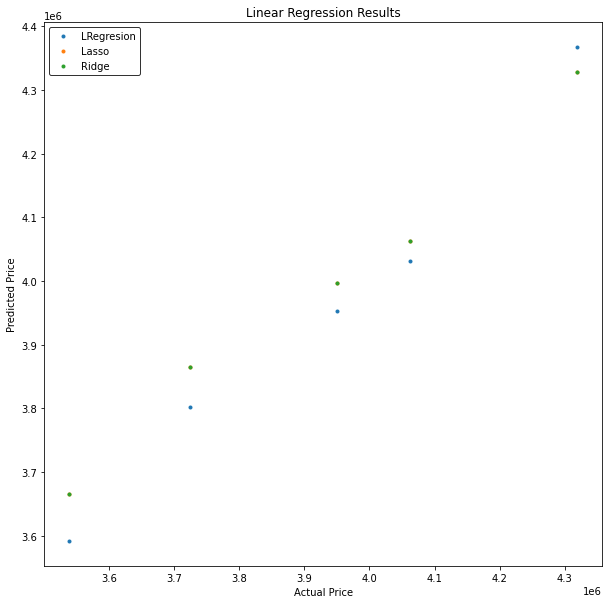

In [257]:
f = plt.figure(figsize=(10,10))
ax = plt.axes()

labels = ['LRegresion', 'Lasso', "Ridge"]

models = [lr, lasso, ridge]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

#####Grid Search

In [285]:
# Random Forest Regressor
parameters = {'criterion': ['mse', "mae"],
              'n_estimators': [50, 100, 150],
              'min_samples_split':[2, 10, 20],
              'min_samples_leaf':[1, 10, 20]}

Rforest_grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, refit=["r2", "neg_mean_absolute_error", "neg_mean_squared_error"], n_jobs=-1)
Rforest_grid.fit(X_train, y_train)
best_parameters = Rforest_grid.best_params_
best_result = Rforest_grid.best_score_

print(best_parameters)
print(best_result)


{'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9624281404126396


In [284]:
# Creating the best Random Forest model for cross validation
rforest = RandomForestRegressor(criterion="mse", min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rforest.fit(X_train,y_train)
predi = rforest.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
print(f'R2-Score:{r2_score(y_test, predi)}\n MSE:{mean_squared_error(y_test,predi)}\n MAE:{mean_absolute_error(y_test, predi)}')


R2-Score:0.9902118500483397
 MSE:710804010.1038916
 MAE:22197.52742000092


In [157]:
# For XGB model
s = StandardScaler()
X_train_scaler = s.fit_transform(X_train)

X_test_scaler = s.fit_transform(X_test)

In [167]:
# XGBRegressor

parameters = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.10],
              'n_jobs': [8], 'early_stopping_rounds':[5, 6, 7]}

xgb_grid = GridSearchCV(estimator=XGBRegressor(), param_grid=parameters, refit=["r2", "neg_mean_absolute_error", "neg_mean_squared_error"], n_jobs=-1)
xgb_grid.fit(X_train_scaler, y_train)
best_parameters = xgb_grid.best_params_
best_result = xgb_grid.best_score_
print(best_parameters)
print(best_result)

[15:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'early_stopping_rounds': 5, 'learning_rate': 0.1, 'n_estimators': 100, 'n_jobs': 8}
0.9415526024594889


In [168]:
# Creating the best xgb model for cross validation
xgb = XGBRegressor(values= best_parameters)
xgb.fit(X_train_scaler,y_train)
predi = xgb.predict(X_test_scaler)
print(f'R2-Score:{r2_score(y_test, predi)}\n MSE:{mean_squared_error(y_test,predi)}\n MAE:{mean_absolute_error(y_test, predi)}')


[15:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2-Score:-2.35171466858427
 MSE:243397602092.27368
 MAE:457987.77799999854


# Evaluation
Cross validation

In [267]:
results_xgb = []
results_rforest = []
results_lr = []
results_lasso = []
results_ridge = []

# Scaler dor XGB
X_scaler = s.fit_transform(X)

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  #XGB
  score = cross_val_score(estimator=xgb, X=X_scaler, y=y, cv=kfold, scoring='r2')
  results_xgb.append(score.mean())
  # Random Forest
  score = cross_val_score(estimator=rforest, X=X, y=y, cv=kfold, scoring='r2')
  results_rforest.append(score.mean())
  #Linear Regression
  score = cross_val_score(estimator=xgb, X=X, y=y, cv=kfold, scoring='r2')
  results_lr.append(score.mean())
  # Lasso
  score = cross_val_score(estimator=lasso, X=X, y=y, cv=kfold, scoring='r2')
  results_lasso.append(score.mean())
  #Ridge
  score = cross_val_score(estimator=ridge, X=X, y=y, cv=kfold, scoring='r2')
  results_ridge.append(score.mean())

0
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72986239571.83588, tolerance: 727995671.9425838
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71139830318.11642, tolerance: 770368963.7400712
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80188249889.22993, tolerance: 731993288.3197968
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62035036419.

1
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73024946339.61032, tolerance: 739694410.219008
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72350117884.25656, tolerance: 747589674.7896476
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77197424587.32184, tolerance: 733436195.2841202
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76040373433.1

2
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73083837943.68642, tolerance: 662765391.562079
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72764580788.19754, tolerance: 782857537.6377114
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67043506659.85578, tolerance: 742276816.4190199
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61610624425.4

3
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68863324559.351, tolerance: 796650177.0610442
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57636267981.33388, tolerance: 718305015.852493
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76385537274.31255, tolerance: 688487663.4156919
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72925013578.739

4
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67892997386.36941, tolerance: 789080368.7175438
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50192255233.220215, tolerance: 599742718.2858765
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80559467213.00781, tolerance: 665457340.0362473
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68012449961

5
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64642407822.52092, tolerance: 680789852.0505991
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76434452874.41393, tolerance: 705814734.3304502
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76734970269.10144, tolerance: 647293295.7133049
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71335281499.

6
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78822177885.45813, tolerance: 672331720.0875638
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63852623090.753586, tolerance: 686928143.2974885
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70858954179.64912, tolerance: 737491752.9392105
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78305464116

7
[16:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77338469061.49454, tolerance: 675804318.6829954
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61427352438.38957, tolerance: 776528344.3366615
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77569627638.76434, tolerance: 757290726.9839916
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64907028817.

8
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79841730153.0453, tolerance: 677173040.2078257
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70469687171.96863, tolerance: 742015735.4110974
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59951636752.70963, tolerance: 547381612.3381094
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69973809602.1

9
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71606426576.81743, tolerance: 764624459.8758003
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73592394650.29187, tolerance: 712602997.9823024
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78031724832.31453, tolerance: 768177225.5974355
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76898744424.

10
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77111005527.56973, tolerance: 730504811.0663419
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77763382875.63277, tolerance: 745245090.6869897
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77198551736.57172, tolerance: 733413527.858393
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67159078527.8

[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79346617598.85114, tolerance: 762539049.1281391
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63918257442.22008, tolerance: 649842576.1147536
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75027122570.24478, tolerance: 774622560.2941812
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75479495768.

12
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69626837076.7741, tolerance: 757645781.9239858
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79582685494.16913, tolerance: 722811690.8328619
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72558232681.67021, tolerance: 745215570.4665989
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78939604661.4

13
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62014878876.65774, tolerance: 770378444.4384799
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79217716083.96432, tolerance: 690077447.5154879
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81023287091.94838, tolerance: 732044672.6044388
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64871668045.

14
[16:03:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72910993829.20302, tolerance: 710956013.8540258
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79582685494.16913, tolerance: 722811690.8328619
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66344835271.651855, tolerance: 775522457.5366538
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59123807153

15
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55655243882.25133, tolerance: 586089424.1490073
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74896972251.79678, tolerance: 687828686.1669916
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70328268550.77765, tolerance: 764436376.4154508
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73972715038.

16
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79683709058.02388, tolerance: 765847612.9711047
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63521105853.53596, tolerance: 788218018.17861
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76756407419.47258, tolerance: 742723617.4789425
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77536971547.23

17
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78239942941.11018, tolerance: 691569560.9187112
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65934769864.06213, tolerance: 604056876.5015343
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76387651701.28271, tolerance: 710970575.9484875
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74360208658.

18
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77836813187.79167, tolerance: 689960508.2605344
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78272805087.82419, tolerance: 714997899.0003171
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72744457335.37708, tolerance: 679288912.4806952
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69413215713.

19
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49359053267.32287, tolerance: 691054005.8009944
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76326627404.55043, tolerance: 720762358.3618854
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70406225022.82738, tolerance: 753808056.3131746
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77796836471.

20
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75944000039.16956, tolerance: 707146102.2301991
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65073715255.46397, tolerance: 683203843.5598819
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70792631390.76881, tolerance: 670275510.6607981
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77772247862.

21
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79789871184.72887, tolerance: 697914932.8698974
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77111005527.56973, tolerance: 730504811.0663419
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71157973923.15886, tolerance: 707191802.181506
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77546883725.8

22
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72580684138.54607, tolerance: 631886700.258466
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65119307872.53432, tolerance: 630681073.3672945
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69561679981.18198, tolerance: 735828080.1853329
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70321972690.5

23
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76363022725.85774, tolerance: 729602985.5387614
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64798940376.11175, tolerance: 604610306.5395383
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63532563331.95897, tolerance: 795311673.6317203
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61295154877.

24
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79893757051.11609, tolerance: 738068492.3053056
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69766790027.61041, tolerance: 717241834.427466
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77197424587.32184, tolerance: 733436195.2841202
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79416838243.5

25
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75419343776.08025, tolerance: 716675030.4772674
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72909629106.51709, tolerance: 787320188.553984
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78932825562.78525, tolerance: 703969264.0580704
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73024946339.6

26
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70529889819.53754, tolerance: 718290364.1003202
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77979921412.02295, tolerance: 785174056.966609
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72540265319.4049, tolerance: 664986628.6454511
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69490373397.33

27
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79925895570.31746, tolerance: 752409427.2001101
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55096708926.35439, tolerance: 592553831.5883672
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69871365345.3911, tolerance: 739733603.6150278
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75620442434.2

28
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79338177508.74228, tolerance: 775313595.1211385
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75098070370.85762, tolerance: 741901965.995682
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61678661988.526344, tolerance: 782373628.3860875
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61845256297.

29
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70518991638.75127, tolerance: 791151678.1463525
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69525987792.31065, tolerance: 727994294.5564172
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55301648989.783714, tolerance: 587460667.0111618
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79927904418

In [270]:
model_results = pd.DataFrame({"XGBRegressor": results_xgb, "Random Forest Regressor": results_rforest, "Linear Regression": results_lr, "Lasso": results_lasso, "Ridge": results_ridge})

In [271]:
model_results

,XGBRegressor,Random Forest Regressor,Linear Regression,Lasso,Ridge
0,0.819384,0.919173,0.822734,0.569390,0.569516
1,0.890851,0.962514,0.892294,0.928852,0.928882
2,0.861529,0.898453,0.861994,0.825423,0.825488
3,0.937744,0.977130,0.941803,0.933363,0.933387
4,0.934716,0.968277,0.942090,0.928630,0.928655
5,0.900930,0.946191,0.902560,0.880292,0.880319
6,0.282421,0.592865,0.290287,0.156438,0.157024
7,0.875460,0.956554,0.934934,0.902230,0.902268
8,0.939798,0.978578,0.945100,0.939678,0.939697
9,-4.905868,-3.919446,-4.904994,-0.642055,-0.642092


In [272]:
model_results.drop(model_results[model_results['XGBRegressor'] < 0].index, inplace=True)

In [273]:
model_results.describe()

,XGBRegressor,Random Forest Regressor,Linear Regression,Lasso,Ridge
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.858897,0.938187,0.866785,0.821158,0.821230
std,0.141823,0.076976,0.141904,0.203490,0.203381
min,0.282421,0.592865,0.290287,0.156438,0.157024
25%,0.870058,0.941733,0.872206,0.833726,0.833763
50%,0.898660,0.964369,0.911506,0.887455,0.887497
75%,0.932886,0.973209,0.937740,0.930238,0.930262
max,0.956739,0.984763,0.962177,0.952985,0.953002


# Which is the best model?
Let's do a hypotheses test to see if there's a difference between the results.
As each result is the average of each round of cross validation, we assume that the results are in normal distribution, according to the central limit theorem. But let's see a graph just out of curiosity.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


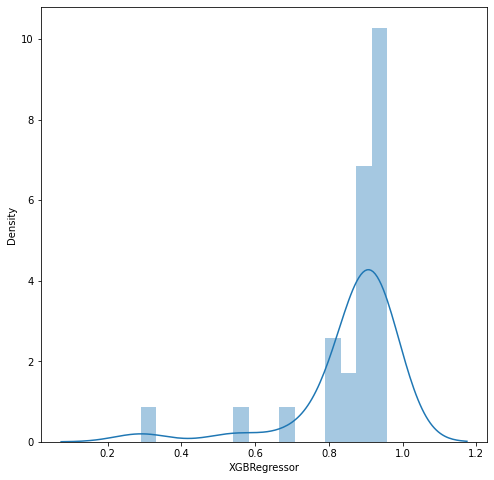

In [178]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(model_results['XGBRegressor']);

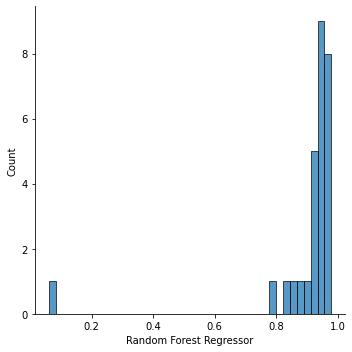

In [179]:
sns.displot(model_results['Random Forest Regressor']);

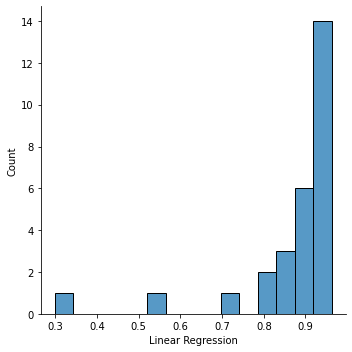

In [180]:
sns.displot(model_results['Linear Regression']);

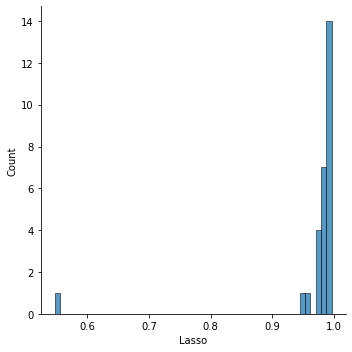

In [181]:
sns.displot(model_results['Lasso']);

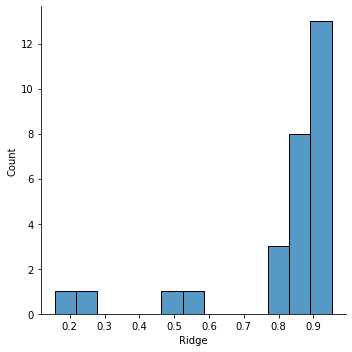

In [274]:
sns.displot(model_results['Ridge']);

In [275]:
# Let's do a hypotheses test to see if the results are really in a normal distribution using the shapiro test.
from scipy.stats import shapiro
alpha = 0.5
shapiro(results_lr), shapiro(results_rforest), shapiro(results_xgb), shapiro(results_lasso), shapiro(results_ridge)
# The second values in the tuples is the p-values.
# Since all the p-values are less than alpha, we reject the null hypotheses and assume that the results ARE in normal distributuion.

((0.2982645630836487, 6.821743170348782e-11),
 (0.27989447116851807, 4.7957342957927196e-11),
 (0.2988641858100891, 6.901382243462706e-11),
 (0.5835192203521729, 4.620204663297045e-08),
 (0.5834187269210815, 4.60749589592524e-08))

In [277]:
# Now the ANOVA test to see if there is statistical difference between the results.
# The null hypotheses is that there isn't difference between the means.
from scipy.stats import f_oneway

f_statistic, p_value = scipy.stats.f_oneway(results_xgb, results_rforest, results_lr, results_lasso, results_ridge)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# we fail to reject the null hypotheses. So we assume that there isn't statistical difference between the model results.

F_Statistic: 0.19609369583306271, P-Value: 0.9400980537178345


# Final considerations

I will save the Random Forest Regressor model, since its the best R2-score and have the lowest variance.

Some part of the data that we use to train and test the models are with an issue, since we have 3 or more very bad results. I will work on this problem in the future.

Let's save are model that predicts the number of deaths by air pollution, and make a prediction for 2022, just for curiosity.

In [278]:
# saving the model
import pickle

with open("Rforest_air_pollution.pkl", "w") as f:
  f = rforest

In [288]:
# Deaths by air pollution prediction for 2022

rforest.predict([[2022]])

# Prediction of 4.605.864 deaths in 2022

array([4605864.4561])